**AUTHOR:**  

Nabiel Husein Shihab / nabielshihab@hotmail.com

**REFERENCES**

NOTE: For educational purposes, some parts of this notebook are copied from said references. Thanks to them!

> - https://www.kindsonthegenius.com/pca-tutorial-1-introduction-to-pca-and-dimensionality-reduction/
> - https://builtin.com/data-science/curse-dimensionality
> - https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/
> - https://docs.oracle.com/en/database/oracle/oracle-database/12.2/dmcon/feature-selection-extraction.html#GUID-564D57DB-7AED-4130-A863-EA1698D6F4B4
> - https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
> - https://tpetzoldt.github.io/RStatistics/multivar-3d.html

**NOTEBOOK DESCRIPTION**

This notebook will tell us about Dimensionality Reduction methods. Dimensionality reduction is a technique where we reduce the number of features from the dataset based on their relevance to the problem. **Principal component analysis (PCA)** and **Nonmetric Multidimensional Scaling (NMDS)** are one of these methods that will be covered in this notebook.  

As Albert Einstein once said,  
*`"Everything should be made as simple as possible, but not simpler."`*

# Problems with High-Dimensional Data

These are some problems we will face when we are dealing with high-dimensional datasets:

> **- Curse of Dimensionality**, it means higher the dimensions, more data is needed!  
> **- Difficult to visualize**  
> **- Time and Space Complexity**. This simply means that more memory space is required and much processing time is needed as well!  
> **- Problem of Over-fitting**  
> **- Redundant Features**  
> **- Noise**

So how do we manage these problems? That is where the concept of dimensionality reduction comes into play. Feature selection and extraction are two approaches to dimension reduction.
> **- Feature selection**: Selecting the most relevant attributes  
> **- Feature extraction**: Combining attributes into a new reduced set of features

# Brief Description About the Methods

## Principal Component Analysis (PCA)

PCA is an **unsupervised learning** approach since it uses only a set of features X1, X2, . . ., Xp without any classes or labels.  

PCA is based on **“orthogonal linear transformation”** which is a mathematical technique to **project the attributes of a data set onto a new coordinate system**. The attribute which describes the most variance is called the first principal component and is placed at the first coordinate. Similarly, the attribute which stands second in describing variance is called a second principal component and so on. In short, the complete dataset can be expressed in terms of principal components. 

Principal component analysis, or PCA, thus **converts data from high dimensional space to low dimensional** space by 
selecting the most important attributes that **capture maximum information** about the dataset. It is a method for feature extraction.

## Nonmetric Multidimensional Scaling (NMDS)

The PCA is a very useful technique as it reduces dimensions without bias, but large proportions of information may still be found at higher dimensions. This is, where the nonmetric dimensional scaling comes into play.  

Here, we can request a number of dimensions k, typically k=2 or k=3 and then the computer tries hard to **squeeze the information** as much as possible into these dimensions. The aim is, that the **distances between in all dimensions are represented in two or three dimensions only**. Though it is done in an iterative way, it is clear, that this is not perfectly possible and will introduce considerable distortion, called **stress**.  

**Kruskal's Stress Formula** :

> $stress = \sqrt{\frac{\sum{(\delta{_i}{_j} - \delta`{_i}{_j})^2}} {\sum{\delta{_i}{_j}^2}}}$  
  
where:  
$\delta{_i}{_j}$ = distance between sample i and j from observed data  
$\delta`{_i}{_j}$ = distance between sample i and j from projected data

$stress$ quality:  
Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0

# Explanation about The Data

The dataset is loaded with the help of the `sklearn` library.
> - The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two **categories are: malignant and benign**.  
> - The malignant class has 212 samples, whereas the benign class has 357 samples (**Total 569 samples**).  
> - It has **30 features** shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.


# Let's Code

## Import Packages/Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

from matplotlib.collections import LineCollection
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.isotonic import IsotonicRegression

plt.style.use('ggplot')
plt.rcParams["font.size"] = "12"
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

## Custom Functions

In [2]:
def print_percent_variance(pca):
    """
    print explained variance percentage of each PC
    
    Parameter
    ----------
    pca : sklearn PCA object
    """
    
    # get explained variance percentage of each PC
    num_pc = pca.n_components_
    percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals=2)
    columns = [f'PC{n+1}' for n in range(num_pc)]
    
    print("Explained variance")
    print("-"*18)
    for i in range(percent_variance.shape[0]):
        print(f"PC{i+1} : {percent_variance[i]}%")
    
        
def plot_cum_variance(pca, ax=None, **kwargs):
    """
    plot PCA cumulative explained variance ratio
    
    Parameters
    ----------
    pca : sklearn PCA object
    ax: {None/ax} referenced axes 
    """
    
    # check axes availability
    if ax != None:
        ax = ax
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    # check number of PCs
    num_pc = pca.n_components_
    cum_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # plot
    xlabel = range(1, num_pc+1)
    ax.plot(xlabel, cum_variance, alpha=.5, **kwargs)
    ax.scatter(xlabel, cum_variance)
    ax.set_xlabel('number of components')
    ax.set_ylabel('cumulative explained variance')
        

def plot_scree(pca, ax=None, **kwargs):
    """
    PCA scree plot

    Parameters
    ----------
    pca : sklearn PCA object
    ax: {None/ax} referenced axes    
    """

    # cek keberadaan axes plot sebelumnya
    if ax != None:
        ax = ax
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    num_pc = pca.n_components_
    percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals=2)
    columns = [f'PC{n+1}' for n in range(num_pc)]
    
    ax.bar(x= range(1, num_pc+1), height=percent_variance, tick_label=columns, **kwargs)
    ax.set_ylabel('Percentage of Variance Explained')
    ax.set_xlabel('Principal Component')
    ax.set_xticklabels(columns, rotation=90)
    ax.set_title('PCA Scree Plot')
    ax.grid()
    
    
def kruskal_stress(obs_distance, proj_distance):
    """
    Calculate Kruskal's Stress value
    
    Parameters
    ----------
    obs_distance : {array} distance from observed points
    proj_distance : {array} distance from projected points
    
    Return
    ------
    {float} Kruskal's stress value
    """
    return round(np.sqrt((np.sum((proj_distance - obs_distance)**2)) / np.sum(obs_distance**2)),3)


def plot_projected(points, labels, method='pca', ax=None, **kwargs):
    """
    Plot the projected points in 2D.   
    """
    # check axes availability
    if ax != None:
        ax = ax
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    for label in np.unique(labels):
        i = np.where(labels == label)
        ax.scatter(points[:, 0][i], points[:, 1][i], label=label, **kwargs)

    if method == 'pca':
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
    if method == 'mds':
        ax.set_xlabel('MDS 1')
        ax.set_ylabel('MDS 2')
    if method == 'nmds':
        ax.set_xlabel('nMDS 1')
        ax.set_ylabel('nMDS 2')
    
    ax.legend()
    

def plot_shepard(obs_distance, proj_distance, stress, ax=None, **kwargs):
    """
    Plots Shepard Diagram

    Parameters
    ----------
    obs_distance : {array} 2D array of observed distance matrix (dissimilarity) 
    proj_distance : {array} 2D array of projected distance matrix
    stress : {float} Kruskal's stress value
    ax: {None/ax} referenced axes 
    
    """  
    # check axes availability
    if ax != None:
        ax = ax
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    
    # get lower triangle of arrays
    x = obs_distance[np.triu_indices(obs_distance.shape[0], k = 1)]
    y = proj_distance[np.triu_indices(proj_distance.shape[0], k = 1)]
    
    # isotonic regression    
    ir = IsotonicRegression(out_of_bounds="clip")
    y_fit = ir.fit_transform(x, y)
    R2 = ir.score(x, y)
    
    # sorting
    o = x.argsort()
    
    # plot
    ax.scatter(x, y, **kwargs)    
    ax.step(x[o], y_fit[o], c='peru', lw=2, alpha=0.75)
    ax.text(0.05, 0.85, f'R2 = {round(R2,3)}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0.05, 0.88, f'Stress = {stress}', ha='left', va='center', transform=ax.transAxes)
    ax.set_xlabel('Dissimilarity')
    ax.set_ylabel('Distance in 2D MDS')

In [3]:
def normalize(x, min_range=0, max_range=1):
    """
    Transform an array by scaling each element to a given range. 
      
    Parameters
    ----------
    x: {Array} values
    min_range: {float} min value, default = 0
    max_range: {float} max value, default = 1
    
    Return
    ------
    {Array} rescaled array
    """   
    return ((x - x.min()) / (x.max() - x.min())  * (max_range - min_range)) + min_range
      

## Load Dataset : Breast Cancer

Load the breast_cancer dataset from sklearn.datasets. It is clear that the dataset has 569 data items with 30 input attributes.  There are two output classes-benign and malignant. Due to 30 input features, it is impossible to visualize this data.

In [4]:
# import the breast _cancer dataset
data = load_breast_cancer()

# get features & label
features = data['data']
label = data['target']

# construct a dataframe using pandas
df = pd.DataFrame(data=features, columns=data['feature_names'])
df['label'] = label
df['label'].replace(0, 'Benign',inplace=True)
df['label'].replace(1, 'Malignant',inplace=True)

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign


In [5]:
# features dataframe
df_features = df.drop(['label'], axis=1)
df_features.shape

(569, 30)

## Standardization

We start by Standardizing the data the output is influenced based on the scale of the features of the data.
It is a common practice to normalize our data before feeding it to any machine learning algorithm.
While applying StandardScaler, each feature of our data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

In [6]:
# Scale data befor applying PCA
scaling=StandardScaler()
  
# Use fit and transform method 
scaling.fit(df_features)
scaled_data=scaling.transform(df_features)

## PCA

In the PCA method, we can pass either the number of principal components (cumulative explained variance will follow) or cumulative explained variance value (the number of components will follow) that we want to achieve. 

> **If n_components = None**  
> n_components == min(n_samples, n_features)  
> **If 0 < n_components < 1**  
> select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

Finally we can transform the data to principal components space. Here, several components represent the lower dimension in which we will project our higher dimension data. 

### Apply PCA & Inspect each PC

Explained variance
------------------
PC1 : 44.27%
PC2 : 18.97%
PC3 : 9.39%
PC4 : 6.6%
PC5 : 5.5%
PC6 : 4.02%
PC7 : 2.25%
PC8 : 1.59%
PC9 : 1.39%
PC10 : 1.17%
PC11 : 0.98%
PC12 : 0.87%
PC13 : 0.8%
PC14 : 0.52%
PC15 : 0.31%
PC16 : 0.27%
PC17 : 0.2%
PC18 : 0.18%
PC19 : 0.16%
PC20 : 0.1%
PC21 : 0.1%
PC22 : 0.09%
PC23 : 0.08%
PC24 : 0.06%
PC25 : 0.05%
PC26 : 0.03%
PC27 : 0.02%
PC28 : 0.01%
PC29 : 0.0%
PC30 : 0.0%


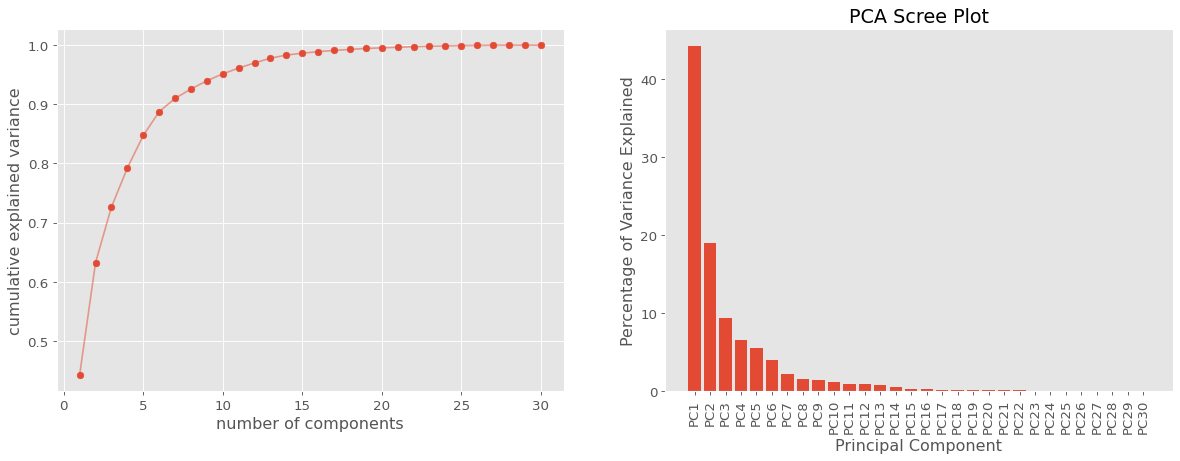

In [7]:
# inspect the percentage of variance explained for each PC
pca = PCA(n_components=None).fit(scaled_data)
projected_pca = pca.transform(scaled_data)

# Print explained variance percentage of each PC
print_percent_variance(pca)

# plots
figure ,ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
plot_cum_variance(pca, ax=ax[0])
plot_scree(pca, ax=ax[1])
plt.show()

We can see from above plots that the number of components needed is 7 in order to explain 0.9 data variance. On the other hand, we can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

### Loading Scores

In [8]:
# dataframe of eigen vectors produced by principal components
df_loadings = pd.DataFrame(data=pca.components_.T, 
                                 index=df_features.columns, 
                                 columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# check PC1 loadings
df_loadings['PC1'].sort_values(ascending=False)

mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean compactness           0.239285
worst perimeter            0.236640
worst concavity            0.228768
worst radius               0.227997
mean perimeter             0.227537
worst area                 0.224871
mean area                  0.220995
mean radius                0.218902
perimeter error            0.211326
worst compactness          0.210096
radius error               0.205979
area error                 0.202870
concave points error       0.183417
compactness error          0.170393
concavity error            0.153590
mean smoothness            0.142590
mean symmetry              0.138167
worst fractal dimension    0.131784
worst smoothness           0.127953
worst symmetry             0.122905
worst texture              0.104469
mean texture               0.103725
fractal dimension error    0.102568
mean fractal dimension     0.064363
symmetry error             0

### PCA Plot

Let's plot the visualization of the 569 samples along the principal component - 1 and principal component - 2 axis. It should give us good insight into how our samples are distributed among the two classes.

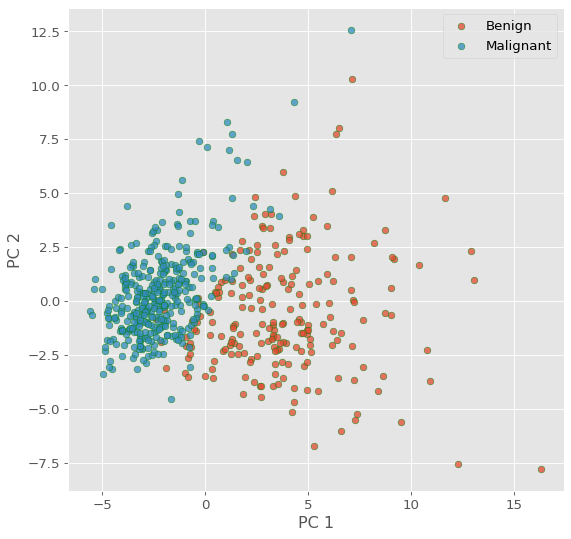

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
plot_projected(projected_pca, 
               method='pca',
               labels=df['label'], 
               edgecolor='g', 
               alpha=0.75,
               ax=ax)

## MDS

### Create distance matrix

In [10]:
distance = euclidean_distances(scaled_data)

### Apply MDS

In [11]:
%%time
mds = MDS(n_components=2, metric=True, max_iter=3000, dissimilarity="precomputed", random_state=1, n_init=20, verbose=1)
mds.fit(distance)

projected_mds = mds.embedding_
projected_mds.shape

breaking at iteration 246 with stress 347075.6222436395
breaking at iteration 266 with stress 358228.34927352174
breaking at iteration 261 with stress 346793.2494653126
breaking at iteration 237 with stress 329255.15508212696
breaking at iteration 428 with stress 301281.67432705587
breaking at iteration 349 with stress 325501.79064214847
breaking at iteration 338 with stress 357216.49414639216
breaking at iteration 368 with stress 327135.3011162366
breaking at iteration 343 with stress 374838.73806089244
breaking at iteration 374 with stress 327084.539585528
breaking at iteration 240 with stress 301987.72814068093
breaking at iteration 300 with stress 357735.78294653964
breaking at iteration 433 with stress 373237.94057978224
breaking at iteration 268 with stress 349692.62238183233
breaking at iteration 258 with stress 317105.1276337557
breaking at iteration 618 with stress 374034.1920616283
breaking at iteration 378 with stress 340341.42587461544
breaking at iteration 483 with stress 

(569, 2)

### Kruskal's Stress Value

In [12]:
distance_mds = euclidean_distances(projected_mds)
stress_mds = kruskal_stress(distance, distance_mds)

print(f"Kruskal's Stress MDS : {stress_mds}")

Kruskal's Stress MDS : 0.176


### mDS Plot

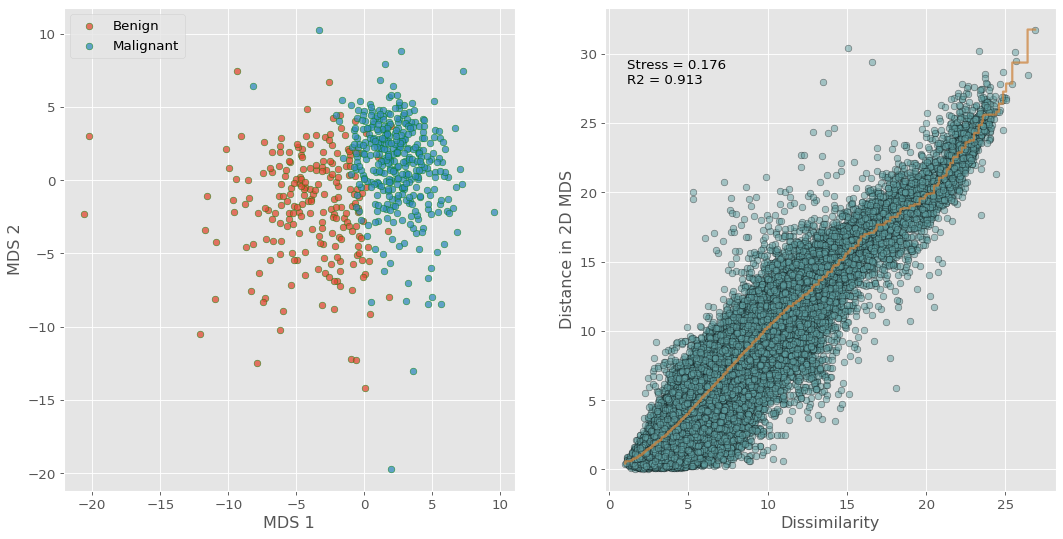

In [13]:
# We can now plot the projected MDS points
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
plot_projected(projected_mds, 
               method='mds',
               labels=df['label'], 
               edgecolor='g', 
               alpha=0.75,
               ax=ax1)

plot_shepard(distance, 
             distance_mds, 
             stress=stress_mds,
             c='cadetblue',
             edgecolor='k',
             alpha=0.5,
             ax=ax2)

## nMDS

### Create distance matrix

In [14]:
distance = euclidean_distances(scaled_data)

### Apply nMDS

In [15]:
%%time
nmds = MDS(n_components=2, metric=False, max_iter=3000, dissimilarity="precomputed", n_init=1, eps=1e-9)
nmds.fit(distance, init=projected_mds)

projected_nmds = nmds.embedding_
projected_nmds.shape

Wall time: 1.47 s


(569, 2)

### Kruskal's Stress Value

In [16]:
# normalize observed distance matrix
distance_norm = normalize(distance)

# normalize nmds distance matrix
distance_nmds = euclidean_distances(projected_nmds)
distance_nmds_norm = normalize(distance_nmds)

In [17]:
stress_nmds = kruskal_stress(distance_norm, distance_nmds_norm)

print(f"Kruskal's Stress nMDS : {stress_nmds}")

Kruskal's Stress nMDS : 0.345


### nMDS Plot

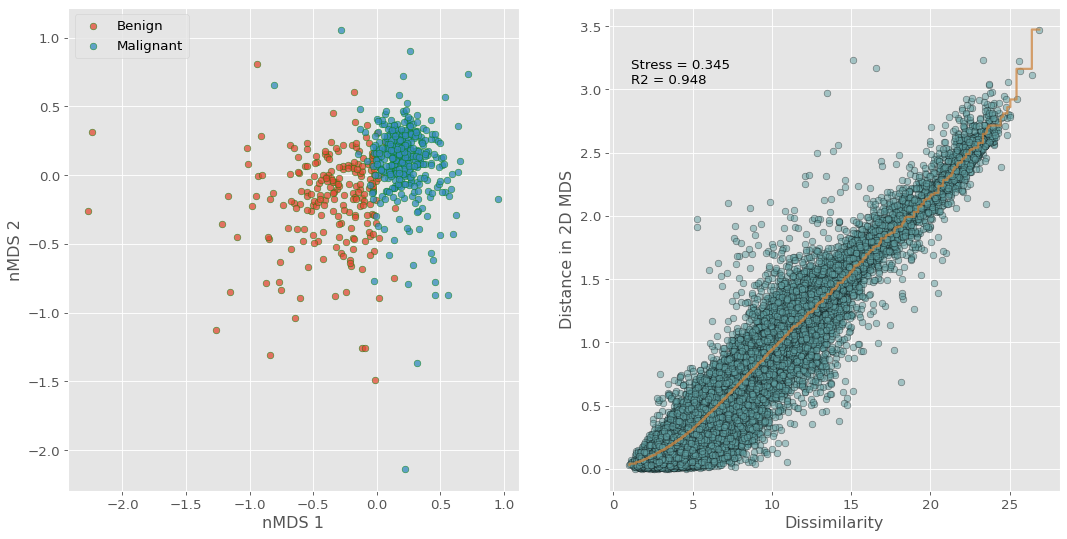

In [18]:
# We can now plot the projected nMDS points
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
plot_projected(projected_nmds, 
               method='nmds',
               labels=df['label'], 
               edgecolor='g', 
               alpha=0.75,
               ax=ax1)

plot_shepard(distance, 
             distance_nmds, 
             stress=stress_nmds,
             c='cadetblue',
             edgecolor='k',
             alpha=0.5,
             ax=ax2)